*Note that this notebook is currently unfinished and only BERTopic has been implemented.*

## Comparing topic modelling techniques

This notebook compares two different advanced topic modelling techniques in terms of how well they represent our PFD data: **BERTopic** and **Top2Vec**.<br><br>


1. **BERTopic**

BERTopic uses BERT embeddings and clustering algorithms to discover topics. Topics are characterised by dense clusters of semantically similar embeddings, identified through dimensionality reduction and clustering. Although not originally supported, v0.13 (January 2023) also allows us to approximate a probabilistic topic distribution for each report via '.approximate_distribution'.<br><br>


2. **Top2Vec**

Topics in Top2Vec are characterised by dense clusters of document and word embeddings. These clusters are identified in a joint embedding space, where both documents and words are represented. It similarly allows for multiple topics per document; this is achieved through the proximity of document embeddings to multiple topic vectors in the semantic space.

Top2Vec uses deep learning-based embeddings (e.g., Doc2Vec, Universal Sentence Encoder) to capture the semantic relationships in the text.<br><br><br>


Neither BERTopic nor Top2Vec require us to pre-specify our number of topics, unlike more classic approaches such as LDA.<br><br><br>



In [1]:
import pandas as pd
import numpy as np

# Read json file
data = pd.read_json('../Data/tokenised.json', orient='split')
data

,URL,CleanContent,ProcessedContent,ProcessedWords,ProcessedSentences,WordEmbeddings
0,https://www.judiciary.uk/prevention-of-future-...,Pre-amble Mr Larsen was a 52 year old male wi...,pre amble mr larsen year old male history ment...,"[pre, amble, mr, larsen, year, old, male, hist...","[[pre, amble, mr, larsen, year, old, male, his...","[[0.0107421875, 0.0791015625, 0.0434570312, -0..."
1,https://www.judiciary.uk/prevention-of-future-...,(1) The process for triaging and prioritising ...,process triaging prioritise ambulance attendan...,"[process, triaging, prioritise, ambulance, att...","[[process, triaging, prioritise, ambulance, at...","[[0.1103515625, 0.255859375, 0.0341796875, -0...."
2,https://www.judiciary.uk/prevention-of-future-...,(1) There are questions and answers on Quora’s...,question answer quora website provide informat...,"[question, answer, quora, website, provide, in...","[[question, answer, quora, website, provide, i...","[[0.1010742188, 0.0991210938, -0.0375976562, 0..."
3,https://www.judiciary.uk/prevention-of-future-...,(1) The prison service instruction (PSI) 64/20...,prison service instruction psi set procedure m...,"[prison, service, instruction, psi, set, proce...","[[prison, service, instruction, psi, set, proc...","[[-0.0356445312, -0.142578125, 0.27734375, -0...."
4,https://www.judiciary.uk/prevention-of-future-...,My principal concern is that when a high-risk ...,principal concern high risk mental health pati...,"[principal, concern, high, risk, mental, healt...","[[principal, concern, high, risk, mental, heal...","[[0.046875, -0.23046875, 0.328125, -0.16308593..."
...,...,...,...,...,...,...
392,https://www.judiciary.uk/prevention-of-future-...,1. Brenda Morris was allowed weekend leave on ...,brenda morris allow weekend leave basis partne...,"[brenda, morris, allow, weekend, leave, basis,...","[[brenda, morris, allow, weekend, leave, basis...","[[0.1376953125, -0.0505371094, 0.154296875, 0...."
393,https://www.judiciary.uk/prevention-of-future-...,Barts and the London 1. Whilst it was clear to...,bart london whilst clear evidence heard inques...,"[bart, london, whilst, clear, evidence, heard,...","[[bart, london, whilst, clear, evidence, heard...","[[-0.0341796875, -0.0971679688, -0.0356445312,..."
394,https://www.judiciary.uk/prevention-of-future-...,1. Piotr Kucharz was a Polish gentleman who co...,piotr kucharz polish gentleman commence living...,"[piotr, kucharz, polish, gentleman, commence, ...","[[piotr, kucharz, polish, gentleman, commence,...","[[-0.0346233919, 0.0211960897, 0.0161410663, 0..."
395,https://www.judiciary.uk/prevention-of-future-...,Camden and Islington Trust 1. It seemed from t...,camden islington trust seem evidence heard cam...,"[camden, islington, trust, seem, evidence, hea...","[[camden, islington, trust, seem, evidence, he...","[[-0.052734375, -0.0030517578000000003, -0.007..."


## 1. BERTopic

Below, we perform an initial implementation of BERTopic. 

I found that the most meaningful representation of the text was presented when we looked at 3-word phrases (triagrams) only. However, the model can also be instructed to find a mixture of unigrams and bigrams instead.

In [2]:
from bertopic import BERTopic
from umap import UMAP
from sklearn.feature_extraction.text import CountVectorizer

# Create a list of report contents
reports = data['ProcessedContent'].tolist()

# Initialise the vectorizer 
# ...We set ngram_range to (3, 3) to extract 3-word phrases only (trigrams)
# ...Change to (1, 2) to extract single words (unigrams) and 2-word phrases (bigrams), for example.
vectorizer_model = CountVectorizer(ngram_range = (3, 3))

# Generate a topic model with 10 top terms
bertopic_model = BERTopic(top_n_words = 10,
                          n_gram_range = (3, 3),
                          nr_topics = 10,
                          vectorizer_model = vectorizer_model,
                          umap_model = UMAP(random_state = 230624)) 

# Fit the model to data
topics, probabilities = bertopic_model.fit_transform(reports)

# Find unique topics
unique_topics = set(topics)
num_unique_topics = len(unique_topics)

print(f"Number of unique topics identified: {num_unique_topics}")

# Get topic information
topic_info = bertopic_model.get_topic_info()
print("Topic Info:\n", topic_info)

# Print most frequent topics
bertopic_model.get_topic_freq().head(10)


/home/sam/miniconda3/envs/PFD/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/sam/miniconda3/envs/PFD/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/sam/miniconda3/envs/PFD/lib/python3.8/site-packages/umap/distances.py:1086: 

Number of unique topics identified: 7
Topic Info:
    Topic  Count                                               Name  \
0     -1    119  -1_hmp guy marsh_send copy report_response chi...   
1      0     12  0_decease saw dr_investigation fail identify_s...   
2      1     22  1_risk self harm_self harm suicide_mr santos c...   
3      2     20  2_mental health service_child young people_ado...   
4      3     46  3_send copy report_response chief coroner_find...   
5      4     20  4_uk border force_british transport police_pos...   
6      5    158  5_mental health team_mental health service_uni...   

                                      Representation  \
0  [hmp guy marsh, send copy report, response chi...   
1  [decease saw dr, investigation fail identify, ...   
2  [risk self harm, self harm suicide, mr santos ...   
3  [mental health service, child young people, ad...   
4  [send copy report, response chief coroner, fin...   
5  [uk border force, british transport police, po...

,Topic,Count
0,5,158
1,-1,119
5,3,46
2,1,22
3,2,20
4,4,20
6,0,12


In [3]:
# Add topics to our data frame
data['Topic'] = topics

# Get the top 10 reports for each topic
top_urls_per_topic = {}

for topic in unique_topics:
    if topic != -1:  # Skip the outlier topic if it exists (BERTopic assigns outliers to "topic -1")
        # Filter data by topic and sort by probability
        topic_data = data[data['Topic'] == topic]
        top_reports = topic_data.nlargest(10, 'Topic')
        top_urls = top_reports['URL'].tolist()
        top_urls_per_topic[f'Topic {topic}'] = top_urls

# Print the URLs of the top 10 reports for each topic
print("For each topic, the top 10 most aligned reports are: ")

for topic, urls in top_urls_per_topic.items():
    print(f"{topic}:")
    for url in urls:
        print(url)
    print("\n")


For each topic, the top 10 most aligned reports are: 
Topic 0:
https://www.judiciary.uk/prevention-of-future-death-reports/jason-brown-prevention-of-future-deaths-report/
https://www.judiciary.uk/prevention-of-future-death-reports/mohammed-akram-prevention-of-future-deaths-report/
https://www.judiciary.uk/prevention-of-future-death-reports/lilian-board-prevention-of-future-deaths-report/
https://www.judiciary.uk/prevention-of-future-death-reports/marie-zarins-prevention-of-future-deaths-report/
https://www.judiciary.uk/prevention-of-future-death-reports/robert-stevenson-prevention-of-future-deaths-report/
https://www.judiciary.uk/prevention-of-future-death-reports/2022-0036-prevention-of-future-deaths-report/
https://www.judiciary.uk/prevention-of-future-death-reports/samantha-gould/
https://www.judiciary.uk/prevention-of-future-death-reports/dyllon-milburn/
https://www.judiciary.uk/prevention-of-future-death-reports/samuel-morgan/
https://www.judiciary.uk/prevention-of-future-death-re

                             Word  Probability    Topic
0                  decease saw dr     0.022023  Topic 0
1     investigation fail identify     0.022023  Topic 0
2  serious incident investigation     0.017433  Topic 0
3                full pack tablet     0.017133  Topic 0
4      recommence anti depressant     0.017133  Topic 0
Topic                        Topic 0   Topic 1   Topic 2  Topic 3  Topic 4  \
Bigram                                                                       
able access nomis           0.000000  0.006763  0.000000      0.0      0.0   
adolescent mental health    0.000000  0.000000  0.011977      0.0      0.0   
anti depressant medication  0.016040  0.000000  0.000000      0.0      0.0   
anti depressant prescribe   0.017133  0.000000  0.000000      0.0      0.0   
anti ligature strip         0.000000  0.006763  0.000000      0.0      0.0   

Topic                       Topic 5  
Bigram                               
able access nomis               0.0  
ado

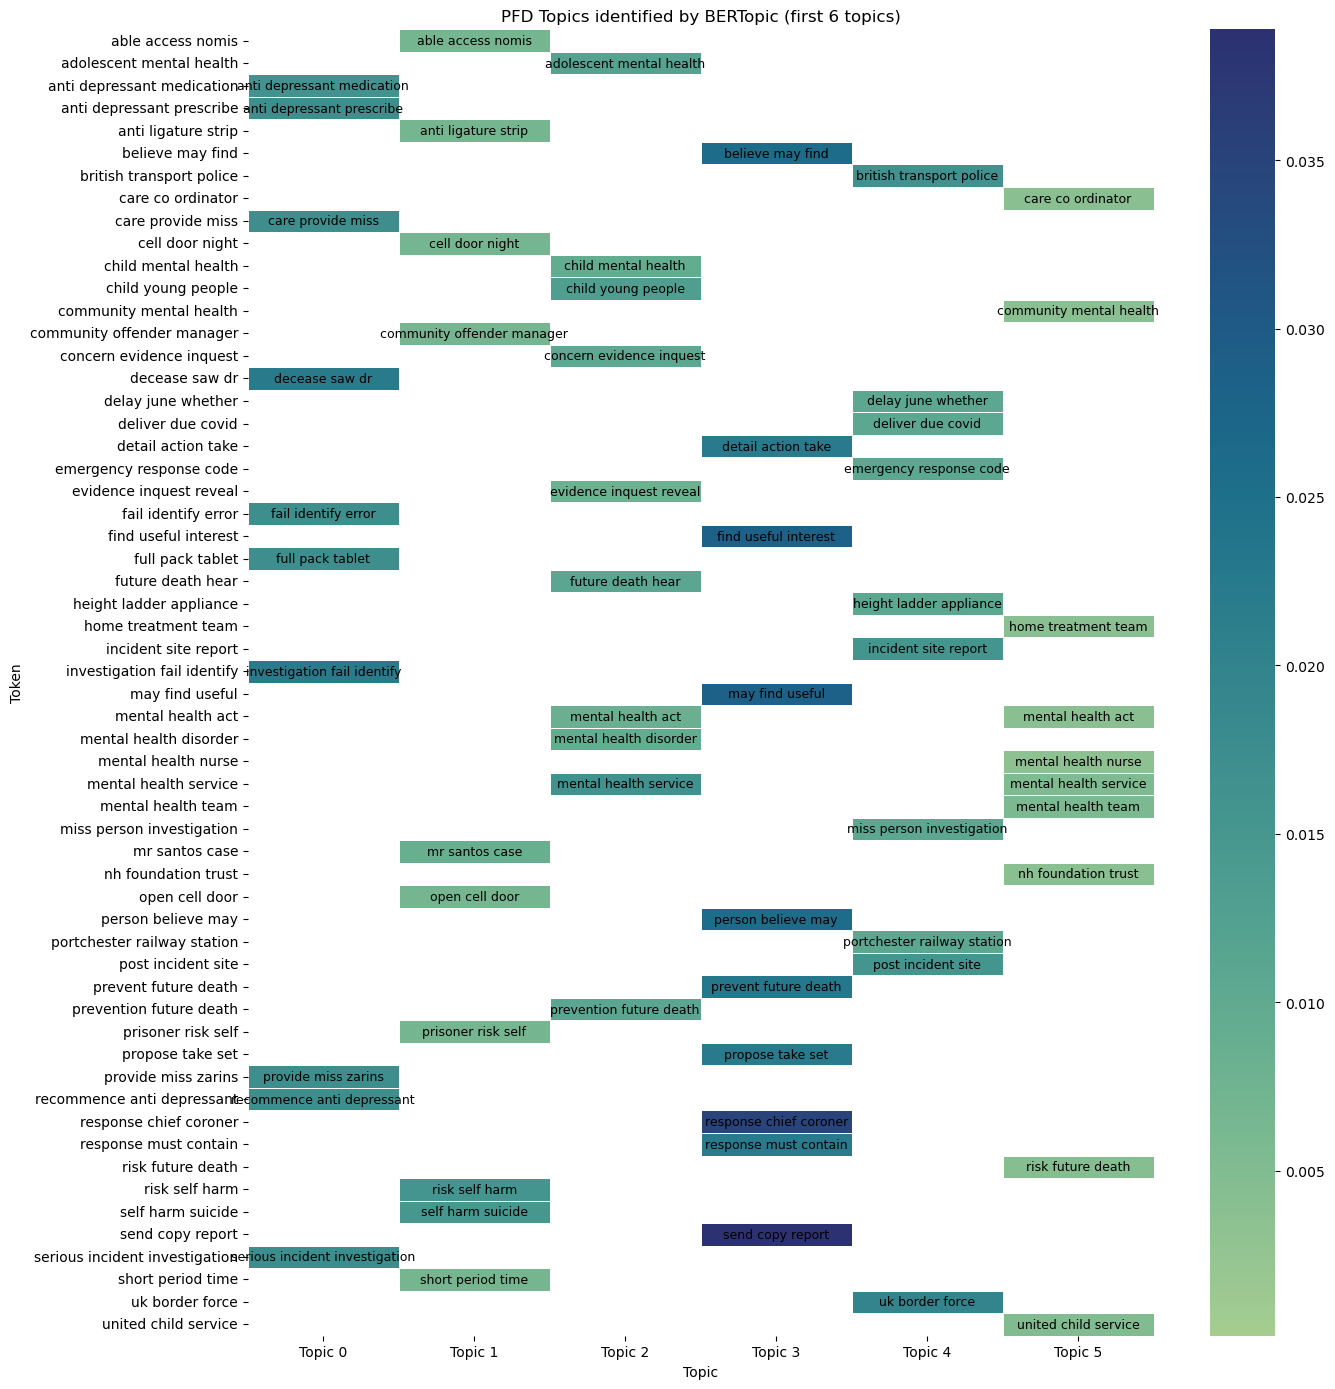

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize DataFrame to store topics data
topics_data = []

# Get unique topics
unique_topics = set(topics)

# Iterate over each unique topic and store the topic data in a DataFrame
for topic_id in unique_topics:
    if topic_id != -1:  # Skip the outlier topic if it exists (reflected through "-1")
        topic_words = bertopic_model.get_topic(topic_id)
        topic_df = pd.DataFrame(topic_words, columns=['Word', 'Probability'])
        topic_df['Topic'] = f'Topic {topic_id}'
        topics_data.append(topic_df)

# Concatenate all topics data into a single DataFrame
topics_df = pd.concat(topics_data, ignore_index=True)

# Check the topics_df content
print(topics_df.head())

# Reshape data from topics DataFrame
reshaped_data = topics_df.rename(columns={'Word': 'Bigram', 'Probability': 'Prob'})

# Set 'Bigram' as index
reshaped_data.set_index('Bigram', inplace=True)

# Create pivot table for heatmap
pivot_table = reshaped_data.pivot(columns='Topic', values='Prob').fillna(0)

# Check the pivot_table content
print(pivot_table.head())

# Plot heatmap
plt.figure(figsize=(14, 14))
cmap = sns.color_palette("crest", as_cmap=True)
cmap.set_under(color='white')

# Generate heatmap
sns.heatmap(pivot_table, cmap=cmap, linewidths=0.5, annot=False,
            cbar=True, mask=(pivot_table == 0), vmin=0.0001)

# Add bigrams with non-zero probability on top of the heatmap
for i, bigram in enumerate(pivot_table.index):
    for j, topic in enumerate(pivot_table.columns):
        if pivot_table.loc[bigram, topic] > 0:
            plt.text(j + 0.5, i + 0.5, bigram, ha='center', va='center',
                     color='black' if pivot_table.loc[bigram, topic] > 0 else 'white', fontsize=9)

# Customize plot
plt.title('PFD Topics identified by BERTopic (first 6 topics)')
plt.xlabel('Topic')
plt.ylabel('Token')
plt.tight_layout()
plt.show()


### Final thoughts

* It looks like our preprocessing notebook failed to completely remove template text. This can be seen through trigrams such as "evidence inquest reveal". I've tried hard to experiment with this by increasing the context window of the GPT model and by prompt engineering, but this has not been successful so far. WE might be confined by the limits of the GPT 3.5 model here - though GPT 4 is significantly more expensive to run.
* It looks like the use of individual names (e.g. "Mr Santos") has created some noise and thrown off the coherence of topics. I did attempt to use the GPT model to remove these names, but this meant increasing the model's context window to the entire report, causing it to perform very badly. GPT 3.5 is notoriously bad with large prompts. The new "GPT 4-o" likely excels here, but it's pricey.
* This output from BERT makes me wonder if the actual "topics" are not that interesting to us. These trigrams are quite interpretable in and of themselves.